# Agenda
## 1. Exploratory Visualization
* 單因素研究：只關注因變量( SalePrice)，並且進行更深入的瞭解。
* 多因素研究：分析因變量和自變量之間的關係。

## 2. Data Cleaning
* 由exploratory visualization 的分析，刪除不需要的Feature
* 逐個看Feature的資料內容，決定填補空值的方式

## 3. Feature Engineering
* numerical variables
>* 調教最強相關的三個Feature → OverallQual，GrLivArea , TotalBsmtSF
>* 調教Label
>* 對剩下的 numerical variables 做處理
* categorical variables
>* categorical variables 手動轉換為有分級性的數值型態 
>* categorical variables 實作 One Hot encoding (對於離散型特徵，一般採用pandas中的get_dummies進行數值化)


## <font color=LightGrey>4. Basic Modeling & Evaluation</font>

## <font color=LightGrey>5. Hyperparameters Tuning</font>

## <font color=LightGrey>6. Ensemble Methods</font>

===========================================================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

In [2]:
probplot

<function scipy.stats.morestats.probplot>

### Read data

In [3]:
# train = pd.read_csv('../input/train.csv')
# test = pd.read_csv('../input/test.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# 1.Exploratory Visualization

## checking SalePrice
#### 分析SalePrice:
* 偏離正態分佈 (實數隨機變量概率分布)
>* 正偏態 (偏度衡量實數隨機變量概率分布的不對稱性。正偏態或右偏態：右側的尾部更長，分布的主體集中在左側)
>* 高峯值 (峰度衡量實數隨機變量概率分布的峰態。峰度高就意味著方差增大是由低頻度的大於或小於平均值的極端差值引起的。)

* 正態分布
>* 偏態值與峰態值，皆為0

In [276]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


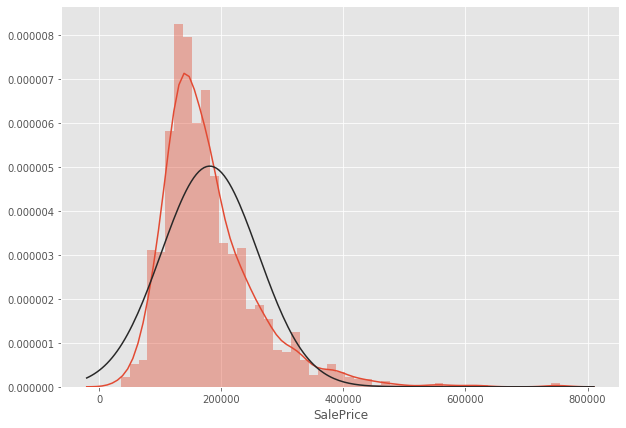

In [277]:
#check SalePrice
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())
plt.figure(figsize=(10,7))
sns.distplot(train.SalePrice, fit=norm)

## Single Feature compare with Label
#### try some important features you guess to compare with SalePrice
#### 這個階段藉由描述文件選出，四個與房價呈強相關的特徵 
* OverallQual (屋況評比(建材, 完成度)
* YearBuilt (建造年分)
* TotalBsmtSF(總地下室面積)
* GrLivArea (生活區域面積)

#### </br> 這邊的精神在於選擇正確的特徵（特徵選擇）而不是定義他們之間的複雜關係（特徵工程）。

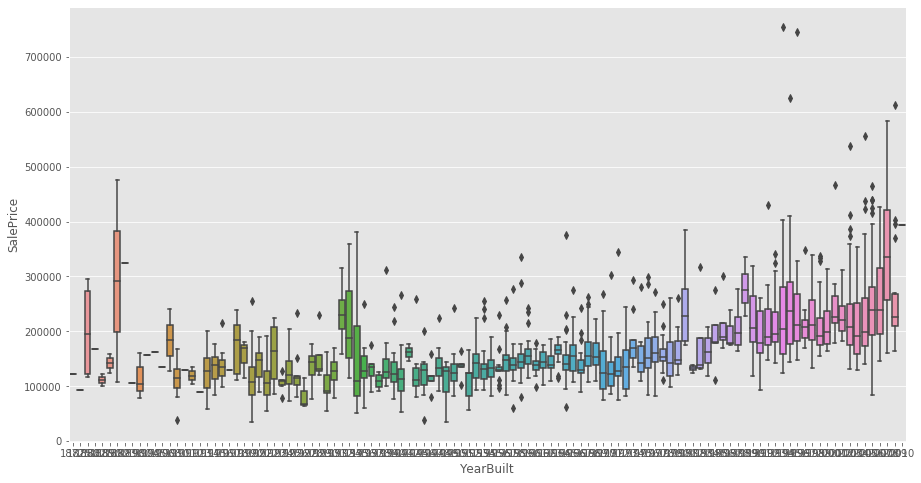

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(train['YearBuilt'], train['SalePrice'])

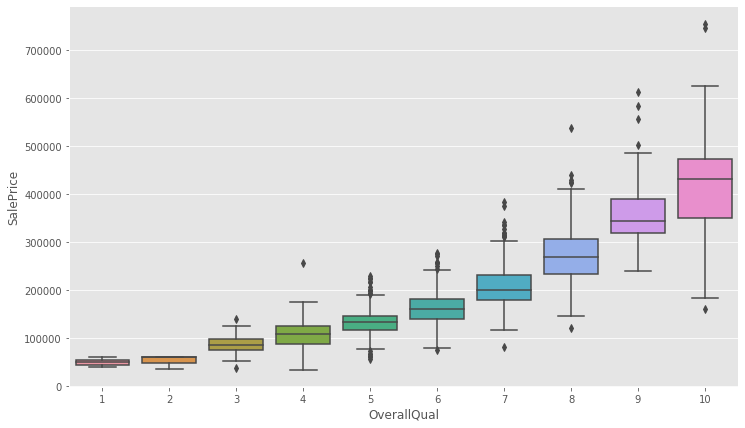

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(train.OverallQual, train.SalePrice)

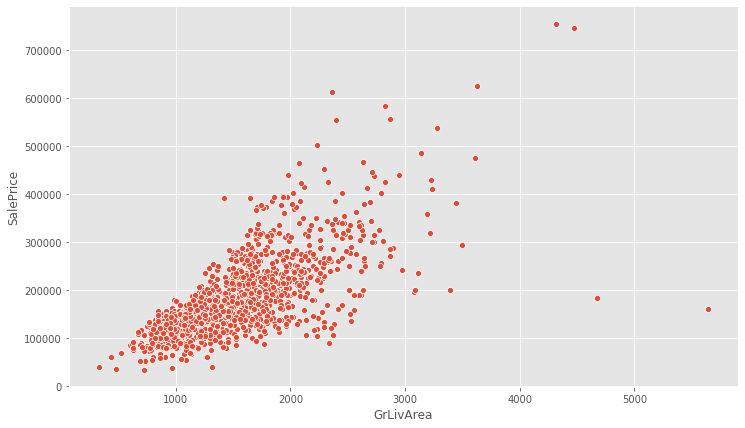

In [9]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=train.GrLivArea, y=train.SalePrice)

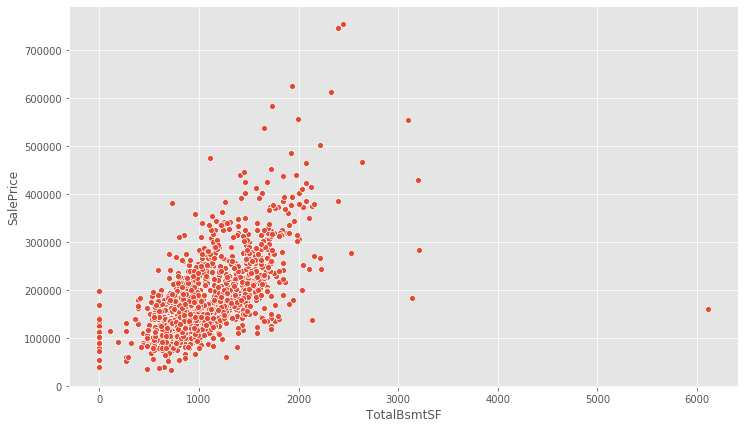

In [10]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=train.TotalBsmtSF, y=train.SalePrice)

##### 一樣呈現正相關，但注意最左邊的點，代表特定情況下 TotalBsmtSF 對 SalePrice 沒有產生影響

## concerning mitiple features at a time
####  Correlation coefficient matrix 相關係數矩陣

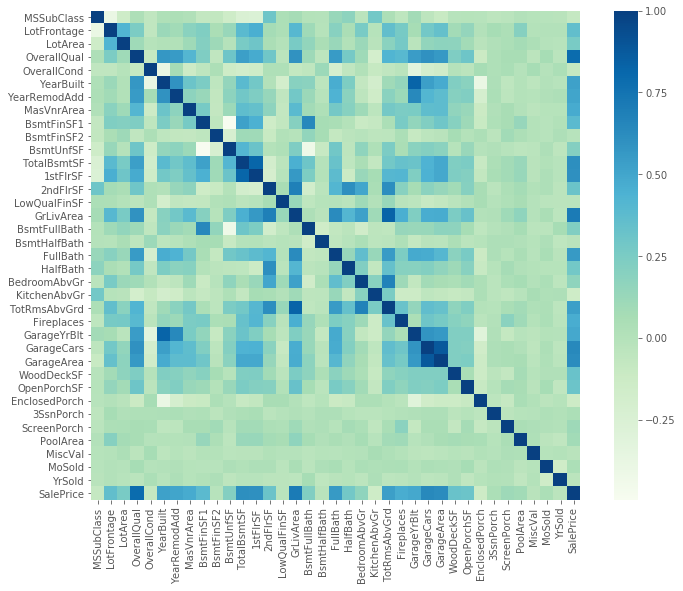

In [14]:
corrmat = train.drop(labels='Id', axis=1).corr() #原始資料有79+1個columns 為何做出來的DataFrame只有37columns
                                                    ## 因為，corr() 會忽略有null的rows &非數值columns
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=1, square=True, cmap='GnBu')

##### 沿著對角線可看到兩個藍色方塊
* TotalBsmtSF(地下室總面積) 和 1stFlrSF(一樓面積) 變量的相關係數 
* GarageX 變量群
##### → 顯示了這些特徵之間很強的關聯性，可推測這些變量幾乎包含相同的信息

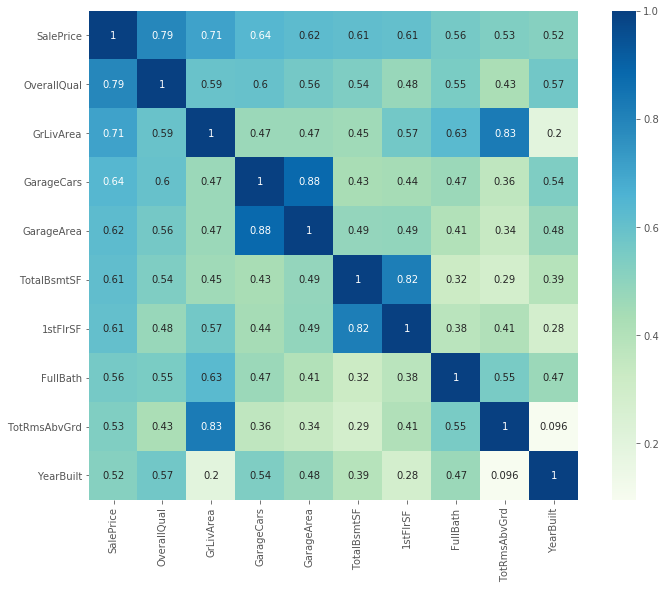

In [15]:
# 取 與SalePrice有最強相關的10個Feature來看
cols = corrmat.nlargest(10, 'SalePrice').index
corrmat2 = train[cols].corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2,vmax=1, square=True,cmap='GnBu',annot=True )

#### 從10個最強相關的特徵中，總結出更好的特徵 
#### 部分同類型的特徵，會有特徵與特徵間關聯度極高的情況，因此目前從其中選擇其一作為重要的特徵 → 選擇正確的特徵(特徵選擇)
* **OverallQual**，**GrLivArea** 以及 **TotalBsmtSF**  與 SalePrice 有很強的相關性
* GarageCars 和 GarageArea 是雙胞胎 (選與SalePrice相關性更高的GarageCars)
* TotalBsmtSF  和 1stFloor是雙胞胎 (選TotalBsmtSF)
* TotRmsAbvGrd 和 GrLivArea 也是雙胞胎
* FullBase(廁所評級) 暫不考慮
* YearBuilt 和 SalePrice 相關性似乎不強

#### SalePrice 和相關變量之間的散點圖 (由上方的結論，只看最重要的features)

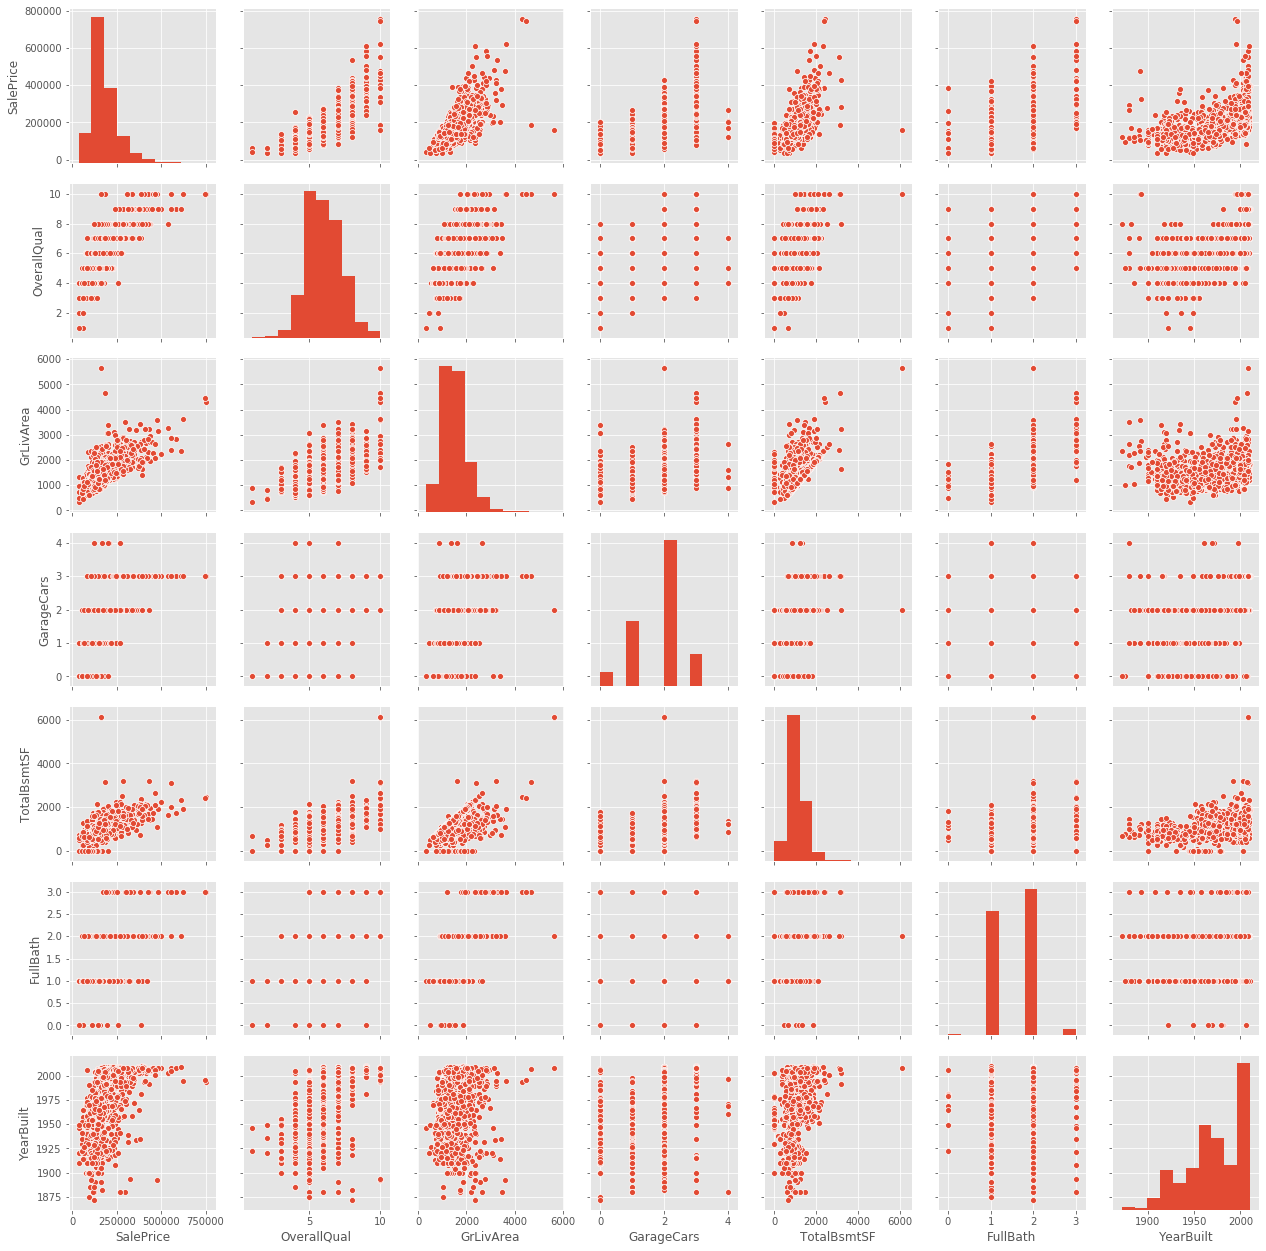

In [16]:
col_form_corr_analy = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[col_form_corr_analy],size=2.5)


## 2. Data Clearning
### Missing value checking

In [6]:
total_data = train.append(test)
total_data.reset_index(inplace=True)
total_data.drop('index', inplace=True, axis='columns')

In [7]:
# 對train + test data 來確認Missing Values
missing_data_sum = total_data.isnull().sum()
missing_data_percent = total_data.isnull().sum()/total_data.isnull().count()
missing_data = pd.concat([missing_data_sum,missing_data_percent],axis=1,  keys=['Total','Percent'])
missing_data.drop(labels='SalePrice', axis=0, inplace=True)

missing_data.sort_values(by=['Total'], ascending=False, inplace=True)
missing_data
# missing_data.to_csv('missing_data')
missing_data = missing_data[missing_data.Total>0]
missing_data

# null 的百分比超過85% 就沒有統計意義，幾乎是無效資料了，捨棄

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageQual,159,0.054471
GarageFinish,159,0.054471
GarageCond,159,0.054471


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

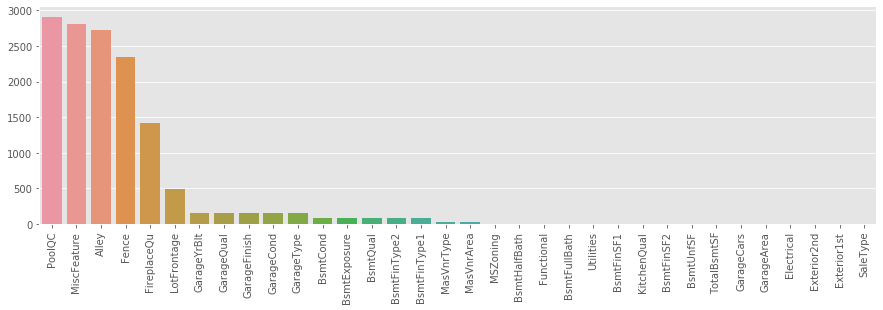

In [8]:
plt.figure(figsize=(15,4))
sns.barplot(x=missing_data.Total.index, y=missing_data.Total.values)
plt.xticks(rotation=90)
# plt.ylim(0, 200)



In [9]:
#Clean Data_remove not important Features
# 刪除的法則: 包含相同訊息的複數個變量，只需留下一個就好，可避免多重共線性
ignor_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt','GarageFinish','GarageCond','GarageQual',
             'GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType','MasVnrArea','BsmtFullBath','BsmtHalfBath',
             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea'] # 這一波刪掉了23個
total_data.drop(columns=ignor_cols, inplace=True)
total_data.shape

(2919, 57)

In [10]:
#Clean Data_fill NA 
total_data['MSZoning'] = total_data['MSZoning'].fillna('RM')
total_data['Utilities'] = total_data['Utilities'].fillna(total_data['Utilities'].mode().iloc[0])
total_data['Functional'] = total_data['Functional'].fillna(total_data['Functional'].mode().iloc[0])
total_data['Exterior1st'] = total_data['Exterior1st'].fillna('Other')
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna('Other')
total_data['TotalBsmtSF'] = total_data['TotalBsmtSF'].fillna(0)
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode().iloc[0])
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode().iloc[0])
total_data['GarageCars'] = total_data['GarageCars'].fillna(0)
total_data['SaleType'] = total_data['SaleType'].fillna('Oth')
total_data.shape

(2919, 57)

## 3-1. Feature Engineering - Numerical Variables

In [11]:
# 調教最強相關的三個Feature → OverallQual，GrLivArea , TotalBsmtSF
# 調教Label
# categorical variables 手動轉換為有分級性的數值型態
# categorical variables 實作 One Hot encoding

#### 調教最強相關的三個Feature → OverallQual，GrLivArea , TotalBsmtSF
#### 先看是否需要對feature 去極值

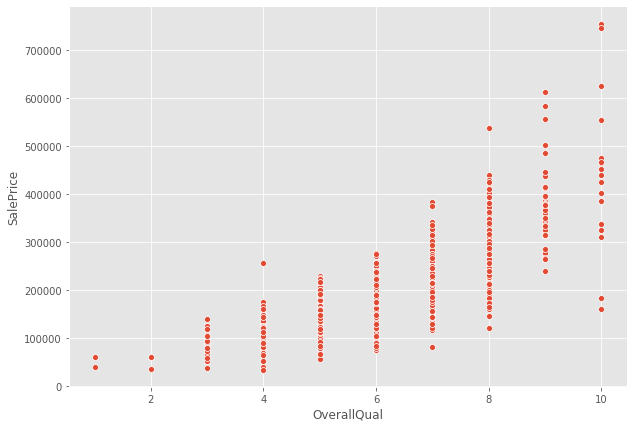

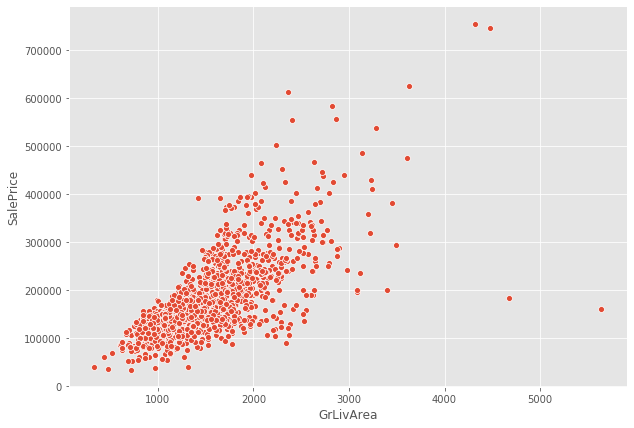

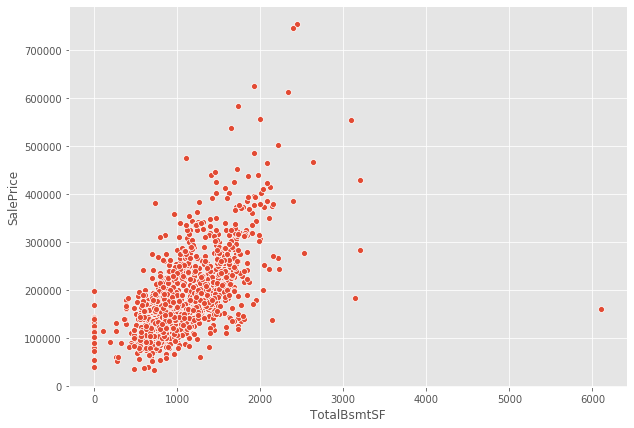

In [12]:
# 確認是否需要去異常值
plt.figure(figsize=(10,7))
sns.scatterplot(x=total_data.OverallQual, y=total_data.SalePrice) #??非連續性分布，像是 分級分布，這種要怎麼做特徵工程，目前跳過不做調整

plt.figure(figsize=(10,7))
sns.scatterplot(x=total_data.GrLivArea, y=total_data.SalePrice)

plt.figure(figsize=(10,7))
sns.scatterplot(x=total_data.TotalBsmtSF, y=total_data.SalePrice)

# ax, fig = plt.subplots(nrows=3,ncols=1 ,figsize=(12,10))  #??為何不能用這個方法

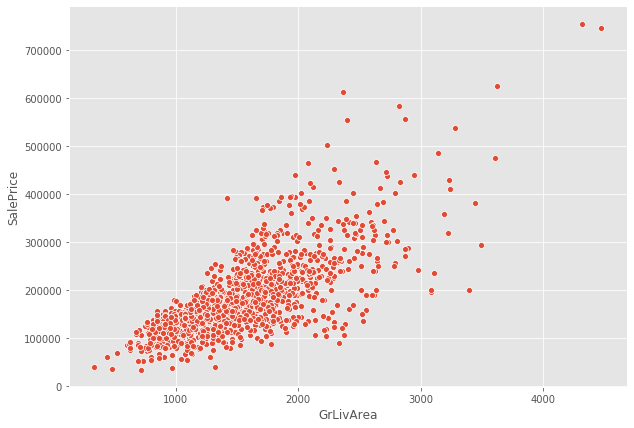

In [13]:
#對GrLivArea去極值
total_data = total_data.drop(index=523)
total_data = total_data.drop(index=1298)
plt.figure(figsize=(10,7))
sns.scatterplot(x=total_data.GrLivArea, y=total_data.SalePrice)

#對TotalBsmtSF去極值
    # 結果發先該極值屬於test_data，因此不更動

#### 進一步理解 SalePrice 如何遵循統計假設，可以讓我們應用多元技術。
##### 應該測量 4 個假設量：
* 正態性
* 同方差性 (Homoskedasticity & Heteroskedasticity)
* 線性 ?? 如何確認
* 相關錯誤缺失(例如:Building_age 欄位內有小於0的值，但這是不合理的)

<br />正態性：應主要關注以下兩點：
* 直方圖 – 峯度和偏度。
* 正態概率圖 – 數據分佈應緊密跟隨代表正態分佈的對角線。?? 畫圖的原理是什麼，這個太方便了

### 調教Label

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900.,  35311.,  37900., ..., 625000., 745000., 755000.])),
 (74213.25959976627, 180932.91906721535, 0.9320154492892369))

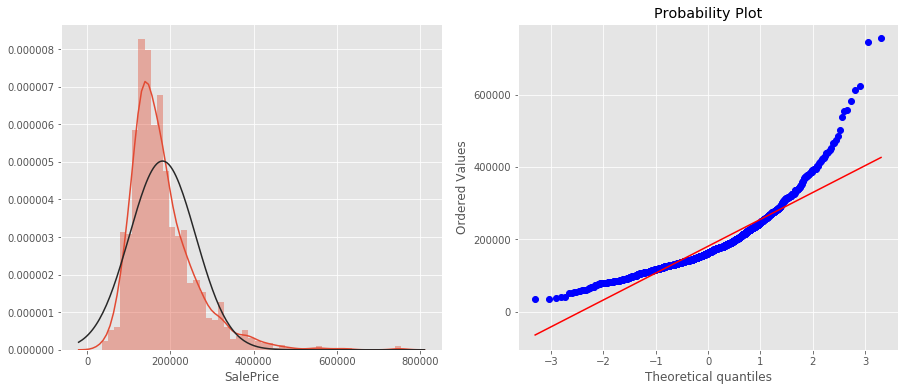

In [14]:
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data[~total_data.SalePrice.isnull()].SalePrice, fit=norm, ax=axes[0][0])
probplot(total_data[total_data.SalePrice>0].SalePrice, plot=axes[0][1])

In [15]:
# 資料還原為 train and test 
train = total_data[~total_data['SalePrice'].isnull()]
print(train.shape)
test = total_data[total_data['SalePrice'].isnull()]
print(test.shape)
test.head()

(1458, 57)
(1459, 57)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1460,896,0,0,2,1Fam,Y,Feedr,Norm,SBrkr,0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1461,1329,0,0,3,1Fam,Y,Norm,Norm,SBrkr,0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
1462,928,701,0,3,1Fam,Y,Norm,Norm,SBrkr,0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
1463,926,678,0,3,1Fam,Y,Norm,Norm,SBrkr,0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
1464,1280,0,0,2,TwnhsE,Y,Norm,Norm,SBrkr,0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [16]:
#進行對數變換
train.SalePrice = np.log(train.SalePrice)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.39853206929765134, 12.024008660964794, 0.995391864831137))

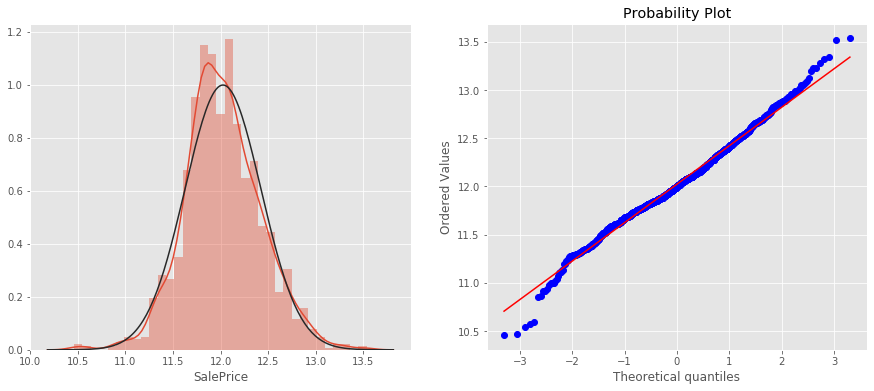

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,6), squeeze=False)
sns.distplot(train.SalePrice, fit=norm, ax=axes[0][0])
probplot(train.SalePrice, plot=axes[0][1])

In [18]:
# 資料再合併回來
total_data = train.append(test)
total_data.reset_index(inplace=True)
total_data.drop('index', inplace=True, axis='columns')

#### 調教GrLivArea

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([ 334,  407,  438, ..., 4316, 4476, 5095], dtype=int64)),
 (483.6204712044011, 1498.2516283853274, 0.9723745182853593))

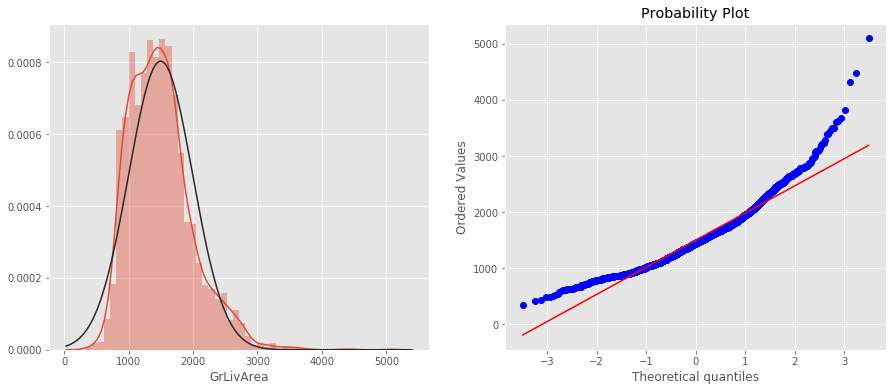

In [19]:
#調教GrLivArea
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data.GrLivArea, fit=norm, ax=axes[0][0])
probplot(total_data.GrLivArea, plot=axes[0][1])

In [20]:
#進行對數變換
total_data.GrLivArea = np.log(total_data.GrLivArea)

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.37008433, 8.40648507,
         8.53601495])),
 (0.3231691749794684, 7.259882015804195, 0.9985345032541895))

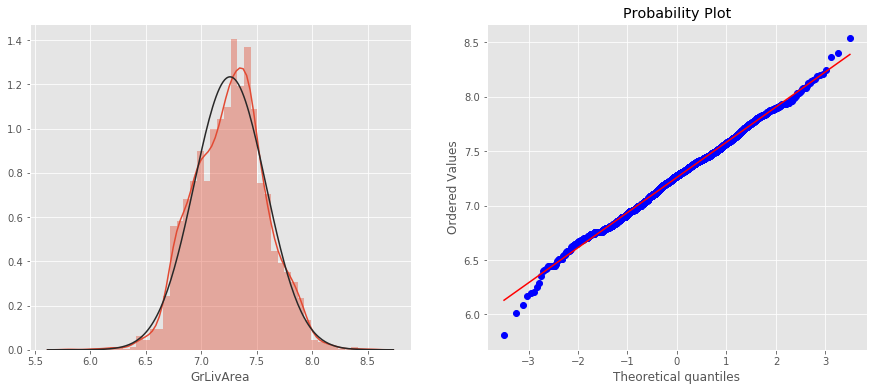

In [21]:
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data.GrLivArea, fit=norm, ax=axes[0][0])
probplot(total_data.GrLivArea, plot=axes[0][1])

#### 調教 TotalBsmtSF

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([   0.,    0.,    0., ..., 3200., 3206., 5095.])),
 (421.46822237763223, 1048.967775111416, 0.9804724671118592))

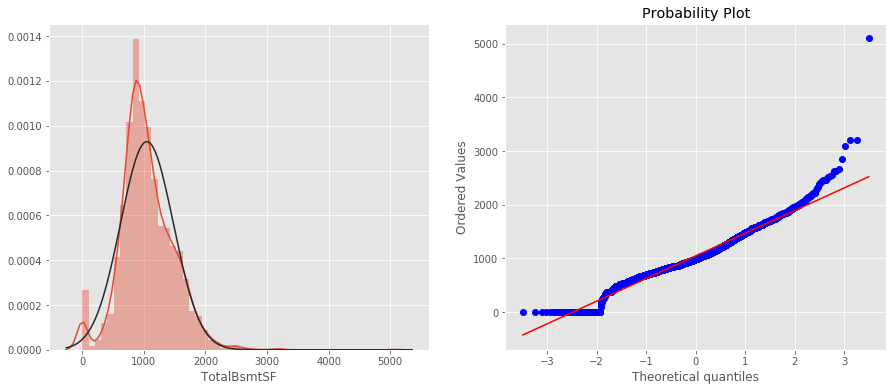

In [22]:
#調教 TotalBsmtSF
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data.TotalBsmtSF, fit=norm, ax=axes[0][0])
probplot(total_data.TotalBsmtSF, plot=axes[0][1])

#### 從圖中可以看出：
* 顯示出了偏度
* 大量爲 0 的觀察值（沒有地下室的房屋）
* 含 0 的數據無法進行對數變換
###### 我們建立了一個變量，可以得到有沒有地下室的影響值（二值變量），我們選擇忽略零值，只對非零值進行對數變換。
###### 這樣我們既可以變換數據，也不會損失有沒有地下室的影響。



In [23]:
total_data['HasBsmt'] = pd.Series(len(total_data.TotalBsmtSF), index=total_data.index)
total_data['HasBsmt'] = 0
total_data.loc[total_data.TotalBsmtSF>0, 'HasBsmt'] = 1

In [24]:
#進行對數變換
total_data.TotalBsmtSF = np.log1p(total_data.TotalBsmtSF) #由於有0 ，所以這裡使用log1p

((array([-3.48703022, -3.24233598, -3.10696736, ...,  3.10696736,
          3.24233598,  3.48703022]),
  array([4.66343909, 5.08140436, 5.1590553 , ..., 8.07121854, 8.0730912 ,
         8.5362112 ])),
 (0.37112444547131007, 6.9170307901699015, 0.9913333827604727))

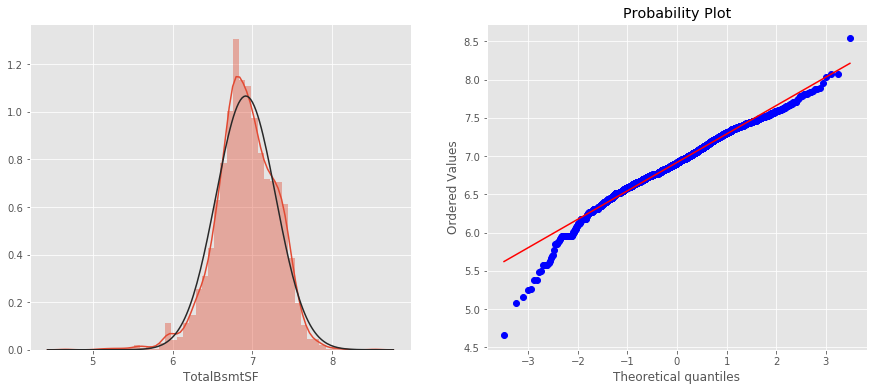

In [25]:
# 這裡忽略0來作圖
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data.TotalBsmtSF[total_data.TotalBsmtSF>0], fit=norm, ax=axes[0][0])
probplot(total_data.TotalBsmtSF[total_data.TotalBsmtSF>0], plot=axes[0][1])

#### 調教OverallQual 
??分級型的數值，可以作正態化調教嗎??  若可以，怎麼做?

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)),
 (1.3710220105669069, 6.086390126842646, 0.9737490927861361))

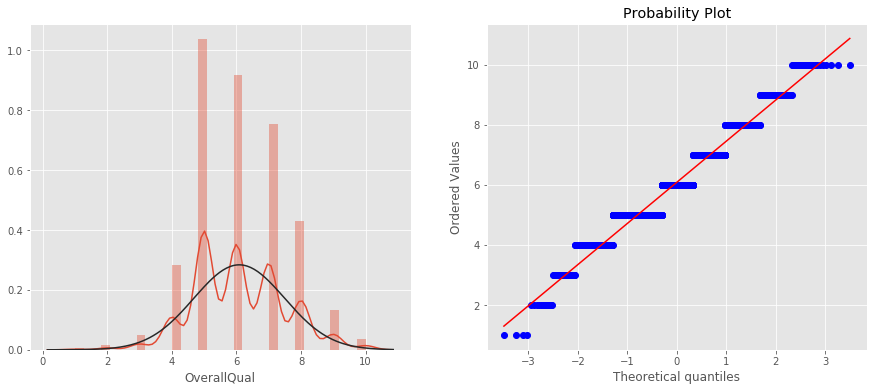

In [26]:
# 調教OverallQual
fig, axes = plt.subplots(1,2,figsize=(15,6), squeeze=False)
sns.distplot(total_data.OverallQual, fit=norm, ax=axes[0][0])
probplot(total_data.OverallQual, plot=axes[0][1])
# 看分布，已經分符合常態分布

### 確認同差方性 or 異差方性

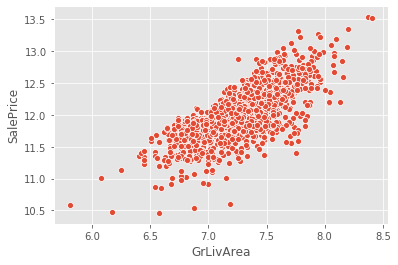

In [27]:
sns.scatterplot(total_data[~total_data.SalePrice.isnull()].GrLivArea  ,total_data[~total_data.SalePrice.isnull()].SalePrice)
# GrLivArea 顯示了同差方性

(4.5, 8.5)

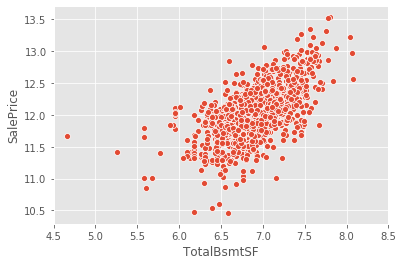

In [28]:
plt.figure()
sns.scatterplot(total_data[~total_data.SalePrice.isnull()].TotalBsmtSF, total_data[~total_data.SalePrice.isnull()].SalePrice)
plt.xlim(4.5,8.5)
# TotalBsmtSF 在接近邊緣的點，顯示了異差方性 (在統計學中數據出現異方差性是正常現象)

#### 繼續對其他numerical variables處理

In [29]:
#Calculate the building age and binning the age
total_data['Building_age'] = total_data['YrSold'] - total_data['YearBuilt']
for idx in total_data.loc[total_data['Building_age']<0].index:
    total_data.loc[idx, 'Building_age'] = 0
total_data['Building_age_class'] = pd.cut(total_data['Building_age'], bins=14) # 多創一個feature，分類同時轉成非數值型資料
# total_data['Building_age'] = total_data['Building_age'].apply(np.log1p)

            # todo:可考慮把原資料 以及 YrSold 刪掉


#Calculate the age of the house after remodification and binning the age
total_data['Remod_age'] = total_data['YrSold'] - total_data['YearRemodAdd']
for idx in total_data.loc[total_data['Remod_age']<0].index:
    total_data.loc[idx, 'Remod_age'] = 0
total_data['Remod_age_class'] = pd.cut(total_data['Remod_age'], bins=14) # 多創一個feature，分類同時轉成非數值型資料
# total_data['Remod_age'] = total_data['Remod_age'].apply(np.log1p)

In [33]:
# 逐個檢查feature的小工具
# original_price = total_data.SalePrice
# original = total_data.loc[total_data['WoodDeckSF']>1 ,'WoodDeckSF']
# original_log = np.log1p(original)

# fig, axes = plt.subplots(3,2,figsize=(15,20), squeeze=False)
# sns.distplot(original, fit=norm, ax=axes[0][0])
# sns.distplot(original_log, fit=norm, ax=axes[0][1])

# probplot(original, plot=axes[1][0])
# probplot(original_log, plot=axes[1][1]) 
                      
# sns.scatterplot(x=original, y=total_data.SalePrice, ax=axes[2][0])
# sns.scatterplot(x=original_log, y=total_data.SalePrice, ax=axes[2][1])

In [34]:
# 逐個檢查feature的小工具 (檢查某個數值的佔比)
# total_data['KitchenAbvGr'].shape
# total_data['KitchenAbvGr'].loc[total_data['KitchenAbvGr']>1].shape

In [35]:
# divide a new feature
total_data['Has2ndFlrSF'] = pd.Series(len(total_data['2ndFlrSF']), index=total_data.index)
total_data['Has2ndFlrSF'] = 0
total_data.loc[total_data['2ndFlrSF']>0 ,'Has2ndFlrSF'] = 1

total_data['HasWoodDeckSF'] = pd.Series(len(total_data['WoodDeckSF']), index=total_data.index)
total_data['HasWoodDeckSF'] = 0
total_data.loc[total_data['WoodDeckSF']>0 ,'HasWoodDeckSF'] = 1

total_data['HasOpenPorchSF'] = pd.Series(len(total_data['OpenPorchSF']), index=total_data.index)
total_data['HasOpenPorchSF'] = 0
total_data.loc[total_data['OpenPorchSF']>0 ,'HasOpenPorchSF'] = 1

In [36]:
# log1P
total_data['LotArea'] = total_data['LotArea'].apply(np.log1p)
total_data['1stFlrSF'] = total_data['1stFlrSF'].apply(np.log1p)
total_data['TotRmsAbvGrd'] = total_data['TotRmsAbvGrd'].apply(np.log1p)
total_data['WoodDeckSF'] = total_data['WoodDeckSF'].apply(np.log1p)
total_data['OpenPorchSF'] = total_data['OpenPorchSF'].apply(np.log1p)

In [37]:
#Change column type to object column(use for one hot encoding)
total_data['MSSubClass'] = total_data['MSSubClass'].astype('str')
total_data['Fireplaces'] = total_data['Fireplaces'].astype('str')

In [38]:
#ignored feature (選擇保留0717)
# ignored_feature = ['LowQualFinSF','HalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','YrSold','KitchenAbvGr']
# total_data.drop(columns=ignored_feature, inplace=True)

In [39]:
total_data.shape

(2917, 65)

### PCA
* 目的在嘗試降維
* 實驗過後，結果失敗，之後跳過這裡不跑

(29, 29)

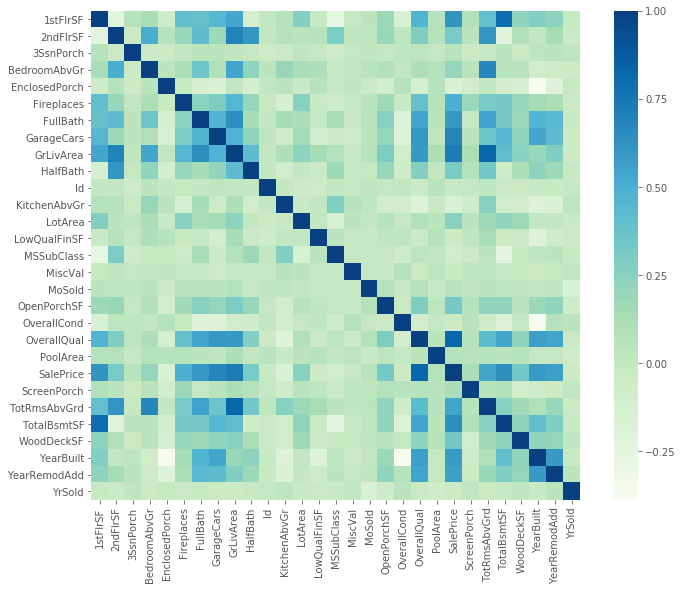

In [187]:
corrmat3 = train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat3, vmax=1, square=True, cmap='GnBu')
corrmat3.shape

(8, 8)

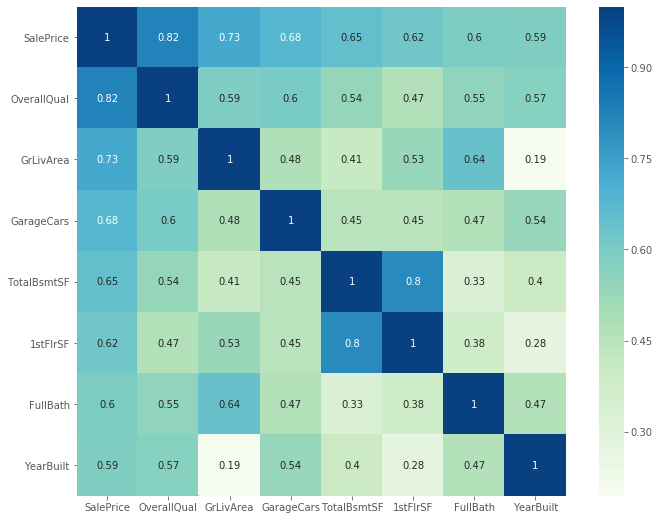

In [188]:
cols2 = corrmat3.nlargest(8, 'SalePrice').index
corrmat4 = train[cols2].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat4, vmax=1, square=True, cmap='GnBu',annot=True)
corrmat4.shape



In [191]:
# 把要做PAC處裡的data分出來
PAC_data = total_data[corrmat3.index].drop(columns=corrmat4.index)
PAC_data = PAC_data.drop(columns='Id') #Id 不需要加入PAC 計算

non_PAC_data = total_data.drop(columns=PAC_data.columns)
PAC_data.shape

(2917, 20)

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,copy=False) #極端一點刻意只保留三個特徵試試看
PAC_data_reduced = pca.fit_transform(PAC_data)
pca.explained_variance_ratio_
# PAC_data_scaled = pca.transform()

array([0.99126236, 0.00521476, 0.00298648])

In [197]:
PAC_data = pd.DataFrame(PAC_data_reduced, index=PAC_data.index)
PAC_data.head()

,0,1,2
0,-1689.201555,-49.092342,517.168903
1,-539.638078,-42.371527,-332.323576
2,1110.748525,-63.788472,524.448490
3,-589.338174,-53.641896,419.212993
4,4121.468301,-79.037096,713.213581


In [198]:
# 把做完PAC處裡的data合併回去
total_data = pd.concat([non_PAC_data, PAC_data], axis=1)
total_data.shape

(2917, 41)

### 3-2. Feature Engineering -  categorical variables : 
### replace specific categorical variables with my definition

In [69]:
total_data.shape

(2917, 65)

In [97]:
#取得categorical variables 的 column names
cols = total_data.columns
categorical_cols = []
for i in cols:
    if total_data[i].astype(str).str.isnumeric()[0] == False:  # 注意這裡加上.astype(str) ，把series內的資料都轉成str， 因為series內的資料若不是str 型別，就不能用str內的方法
        categorical_cols.append(i) 

# 上面的結果會包含浮點數型態的column，要移除
for i in ['1stFlrSF','GrLivArea','LotArea','OpenPorchSF','SalePrice','TotalBsmtSF','WoodDeckSF','TotRmsAbvGrd']:
    categorical_cols.remove(i)


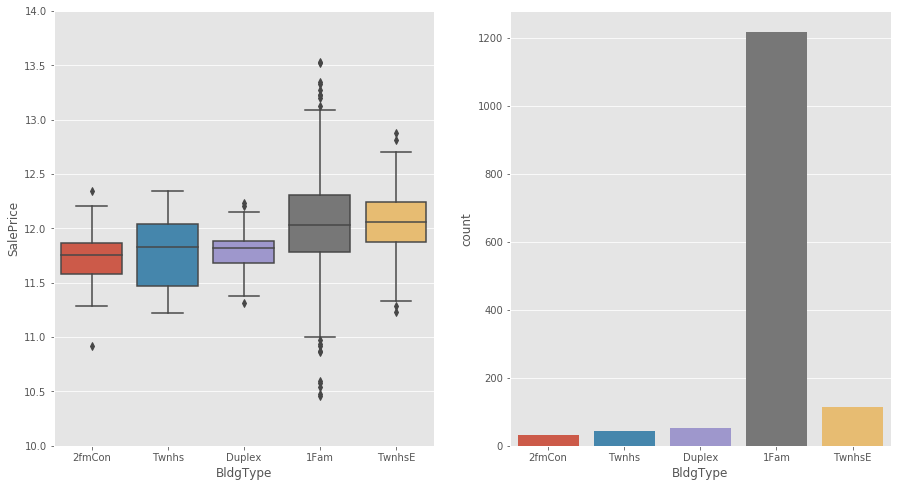

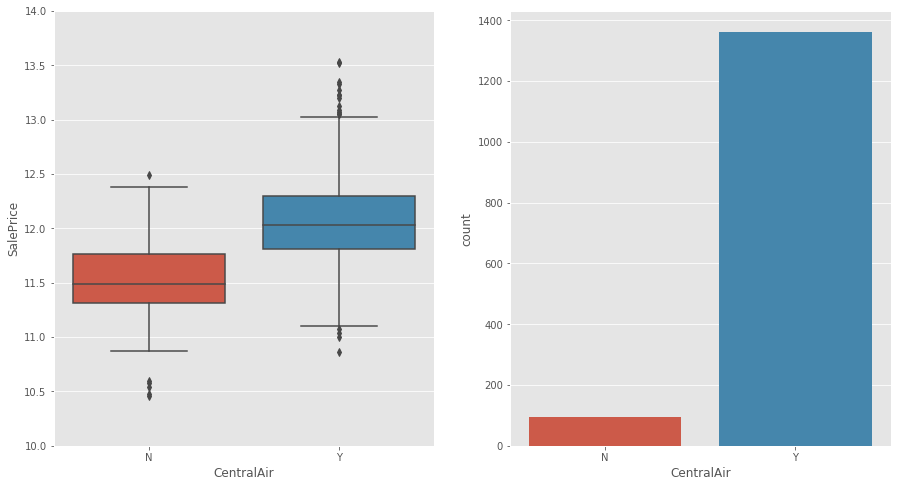

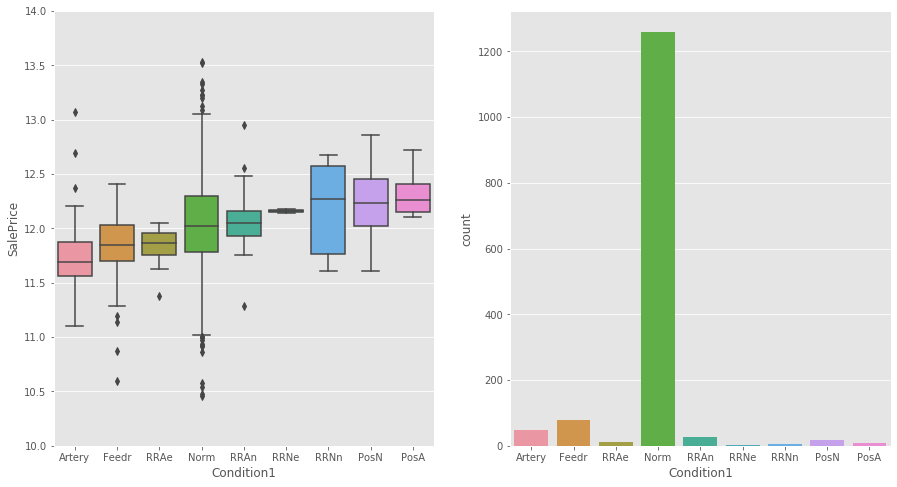

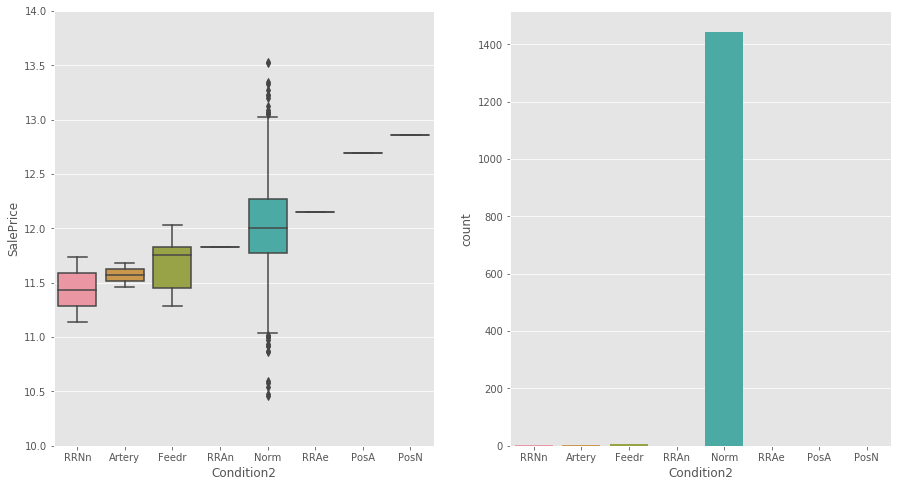

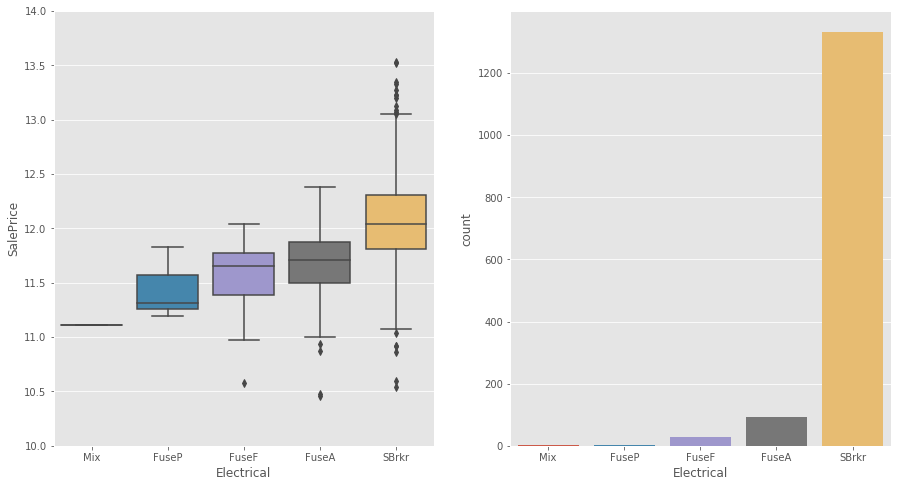

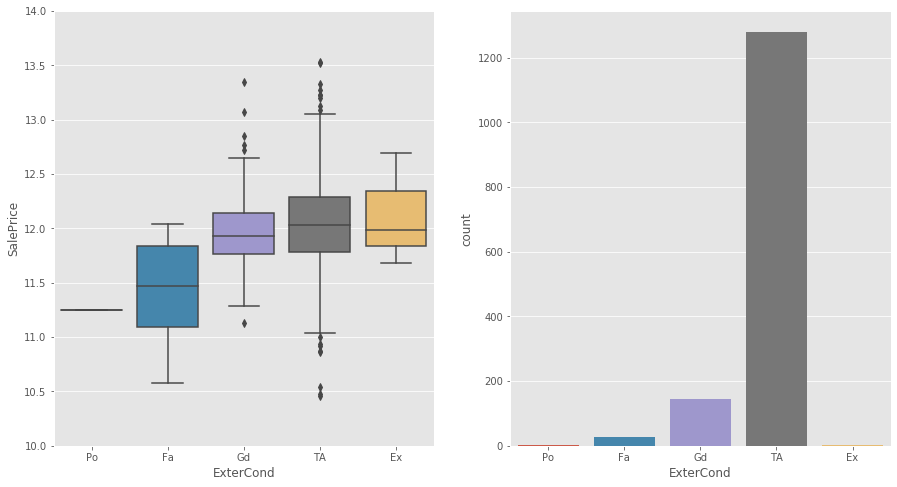

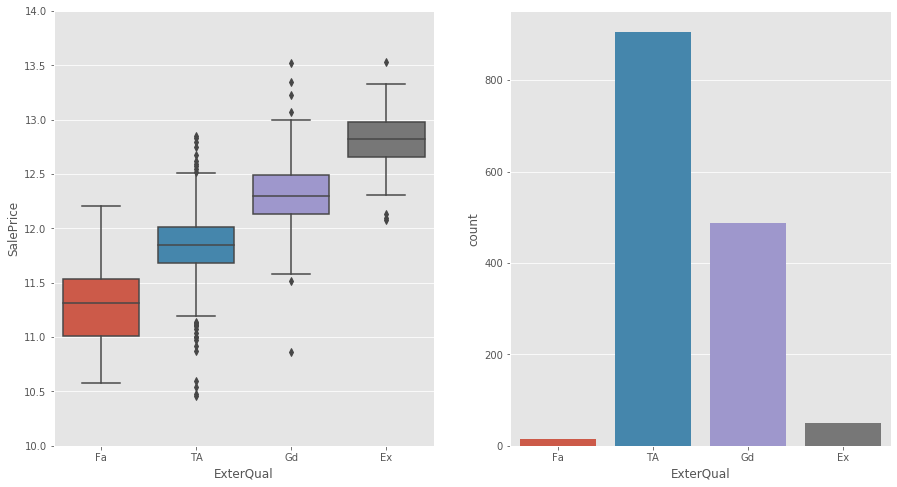

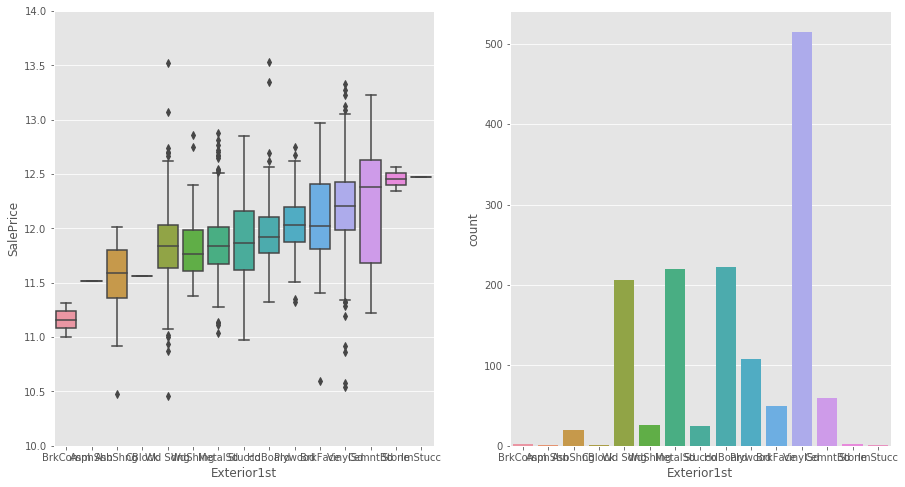

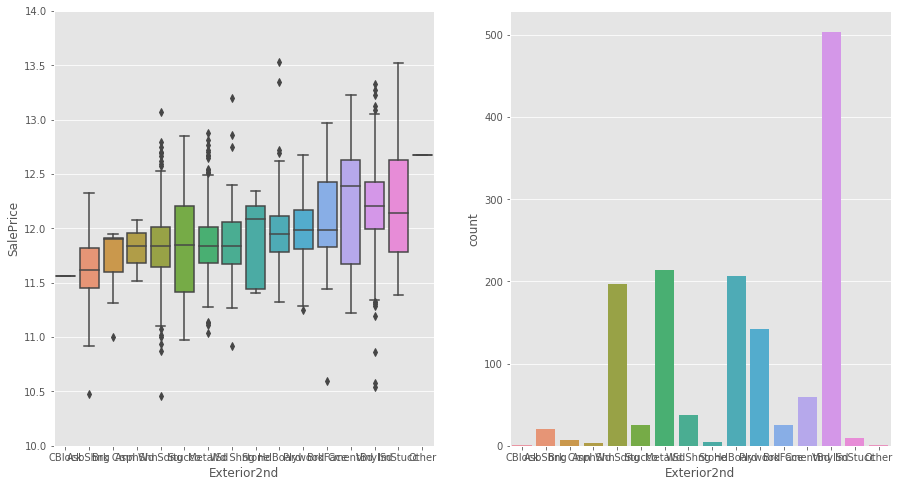

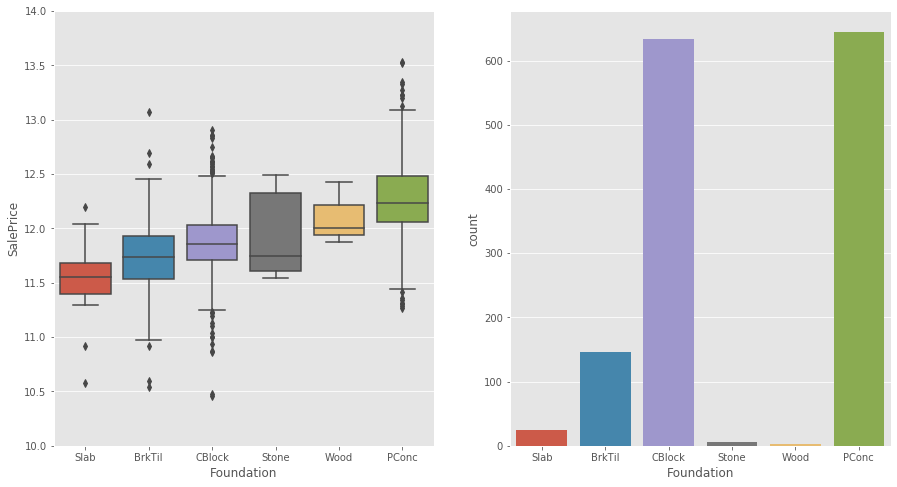

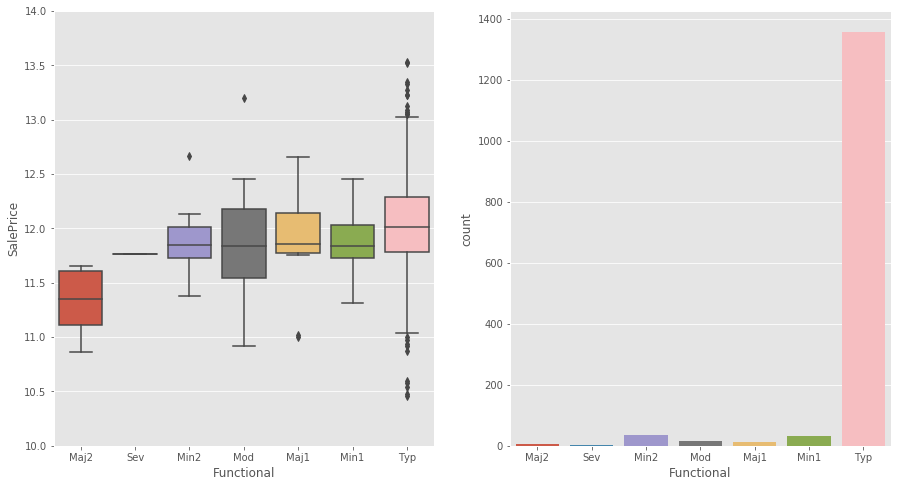

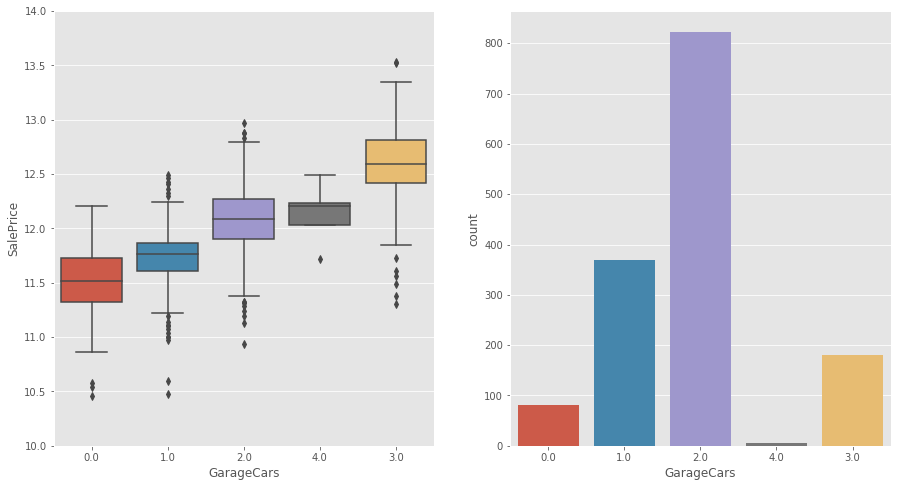

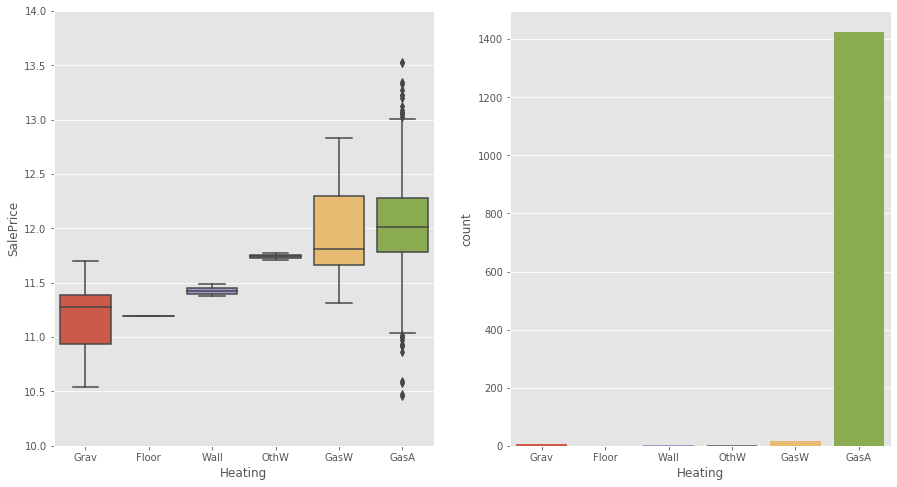

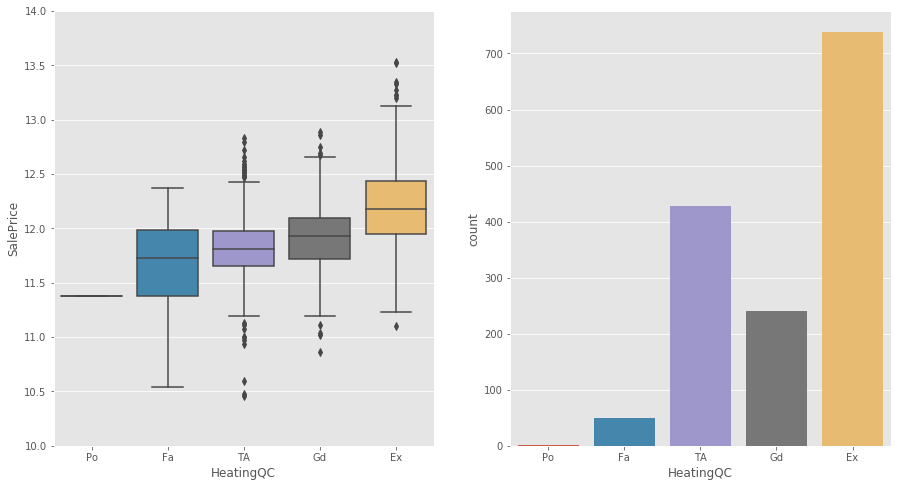

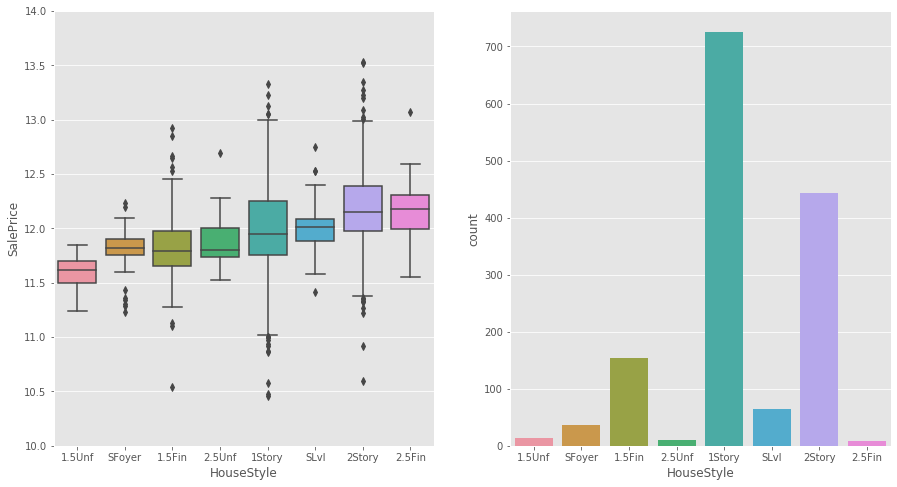

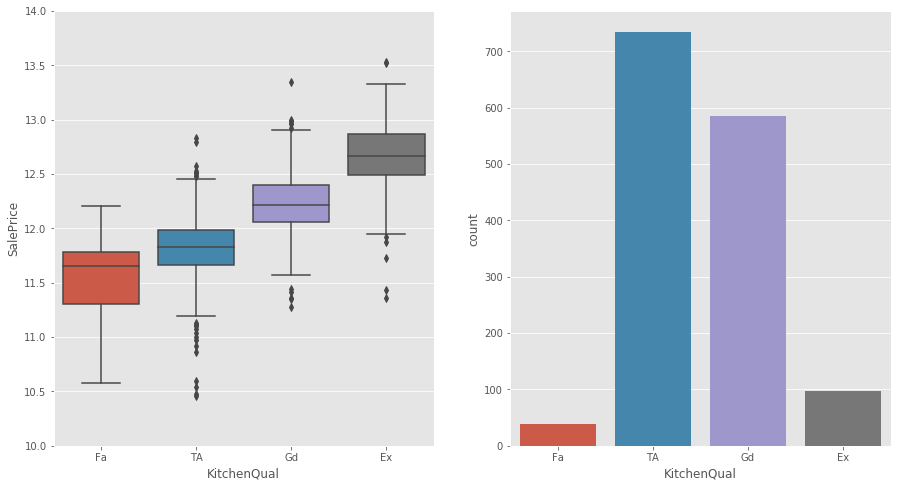

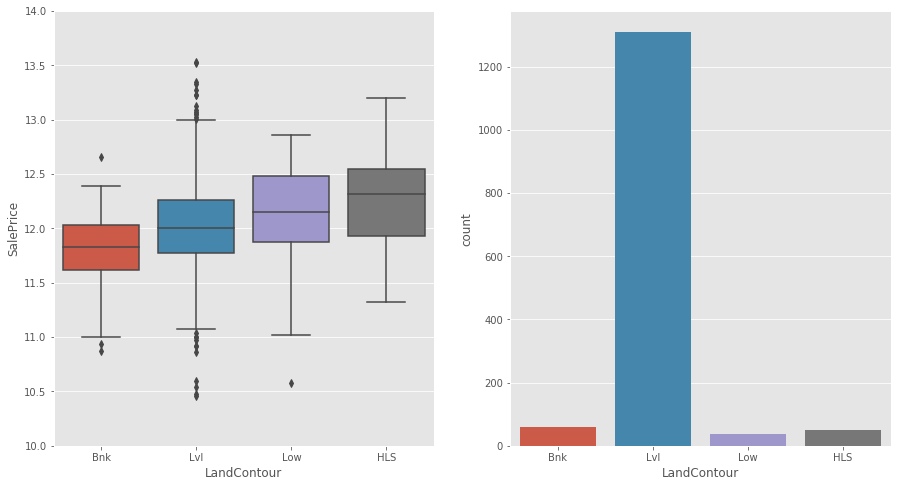

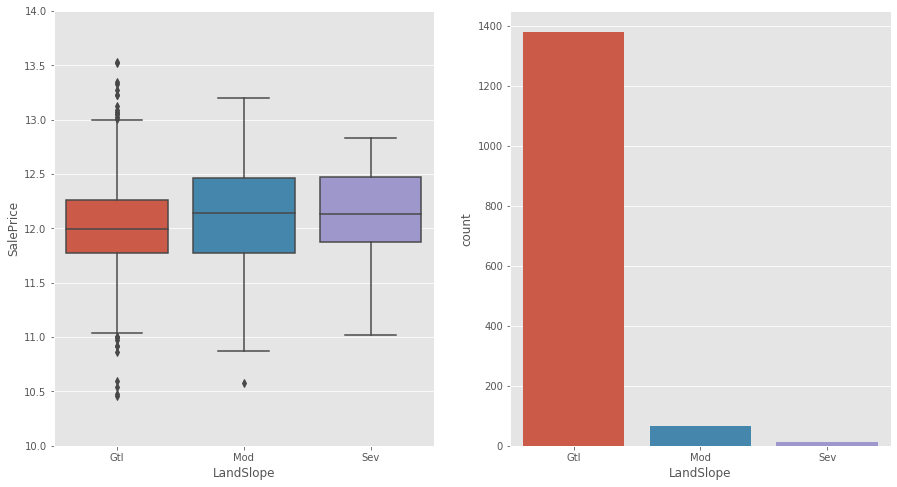

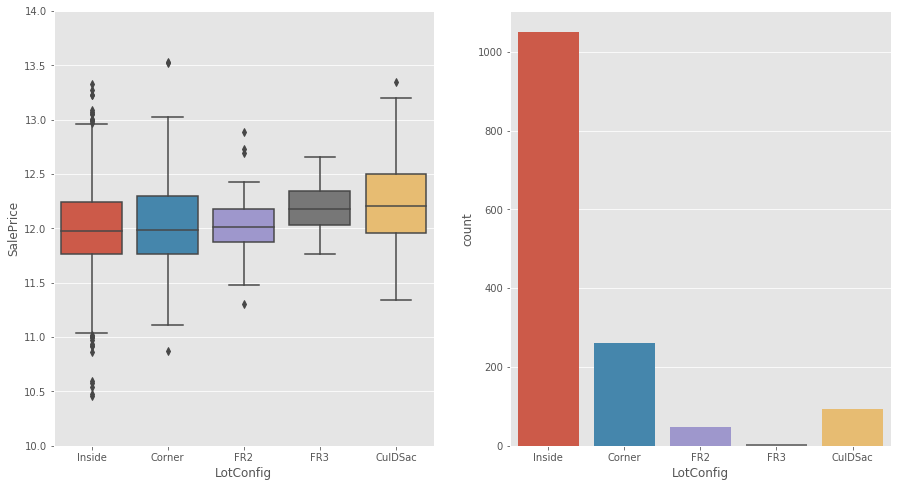

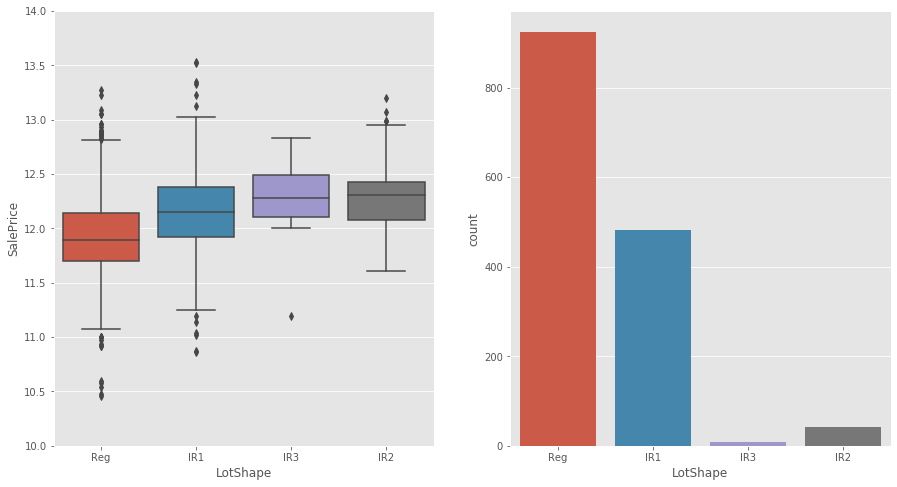

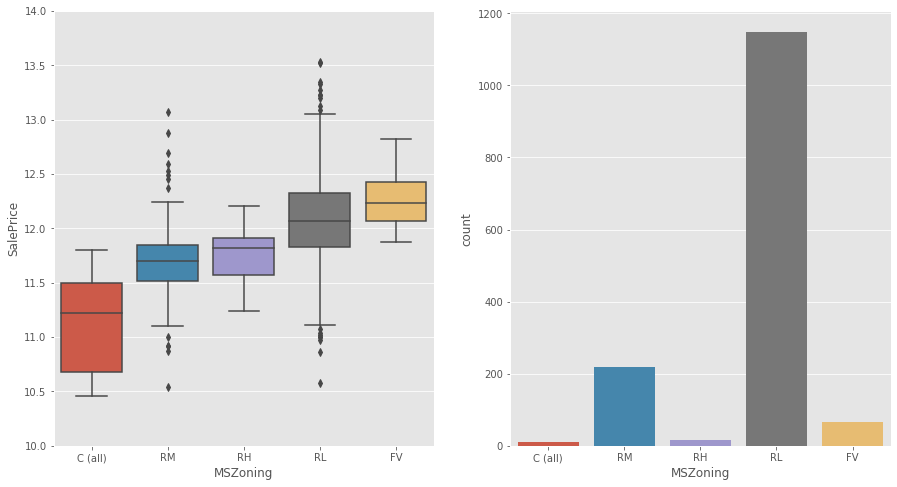

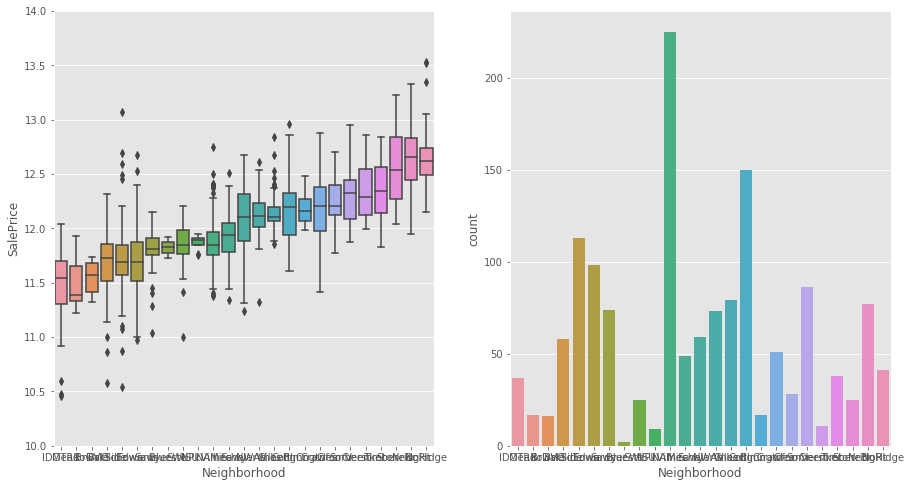

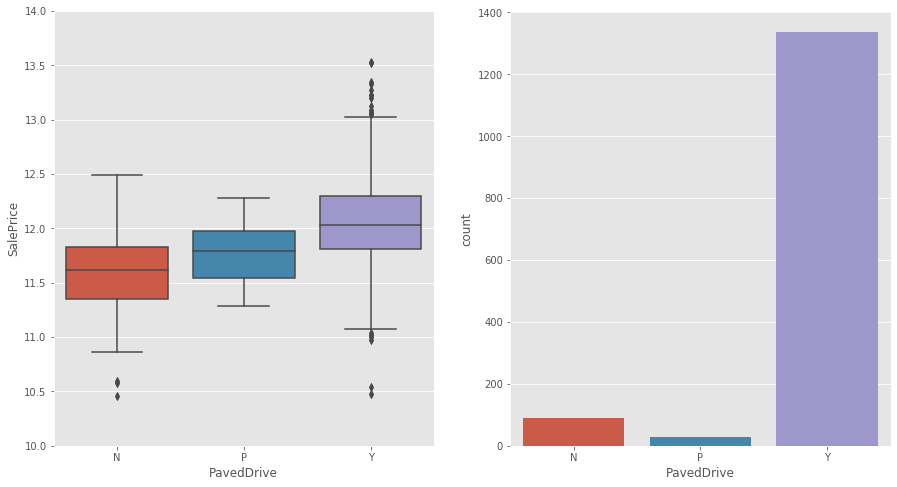

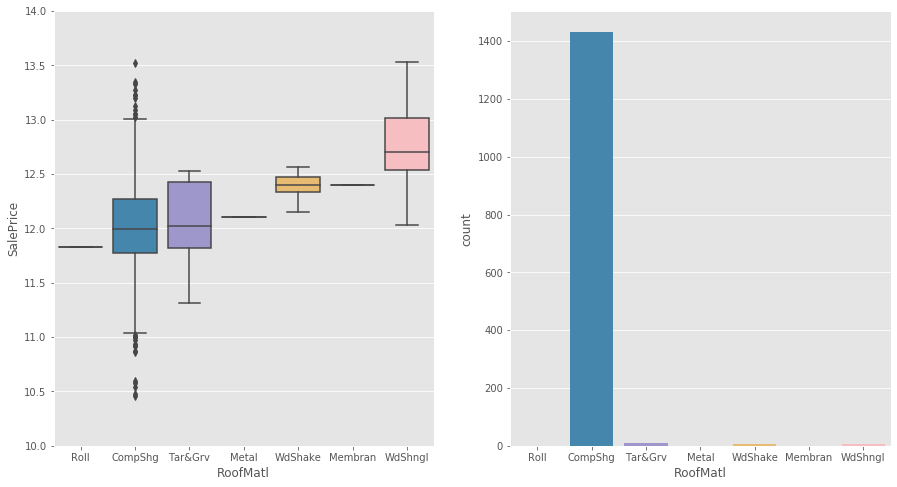

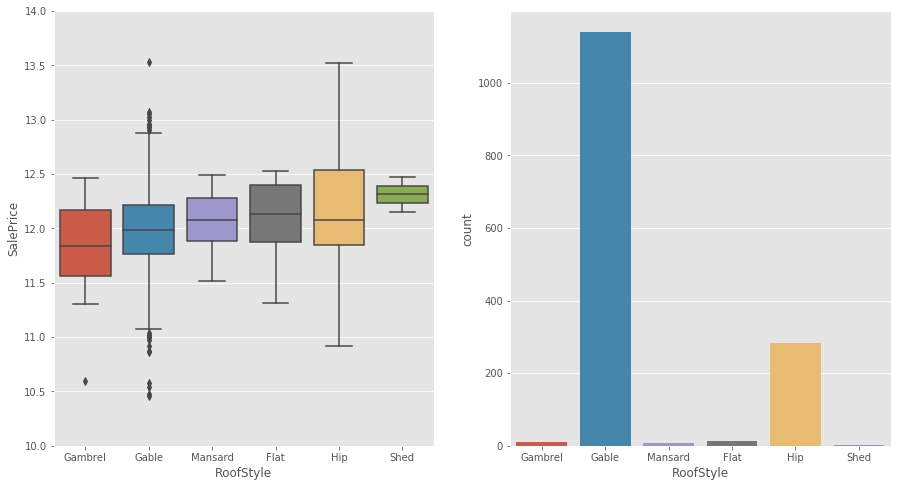

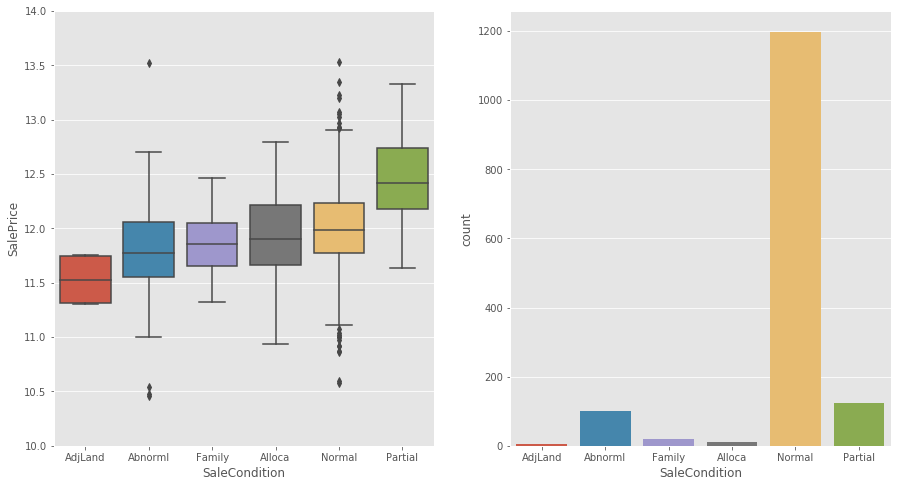

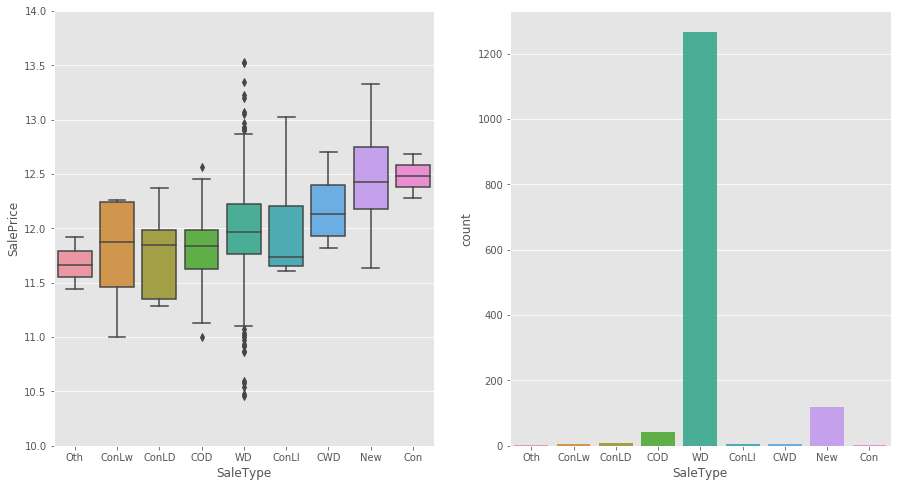

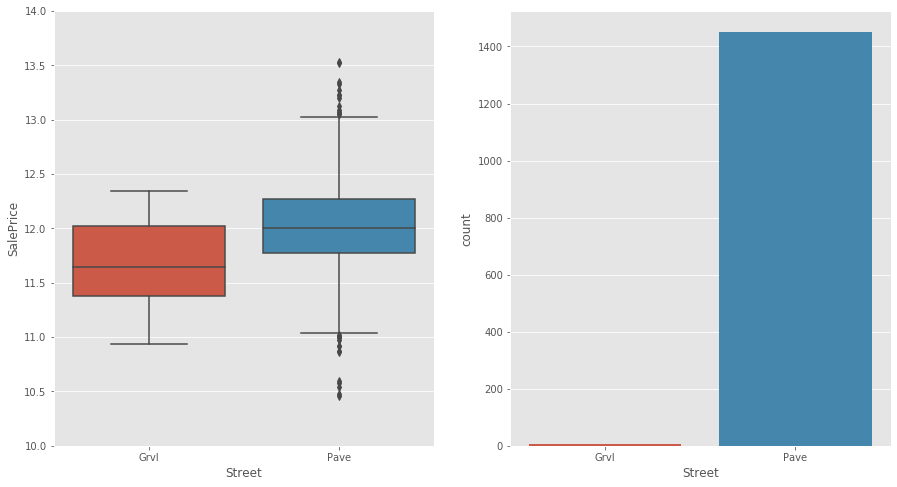

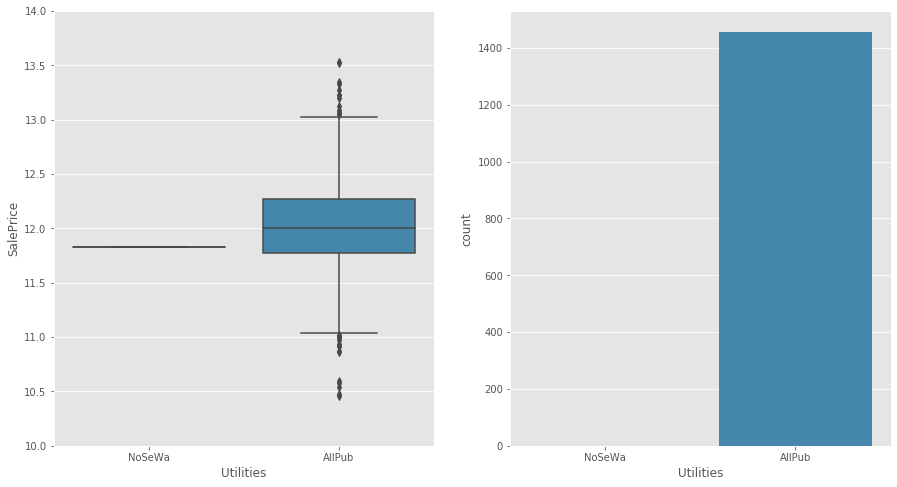

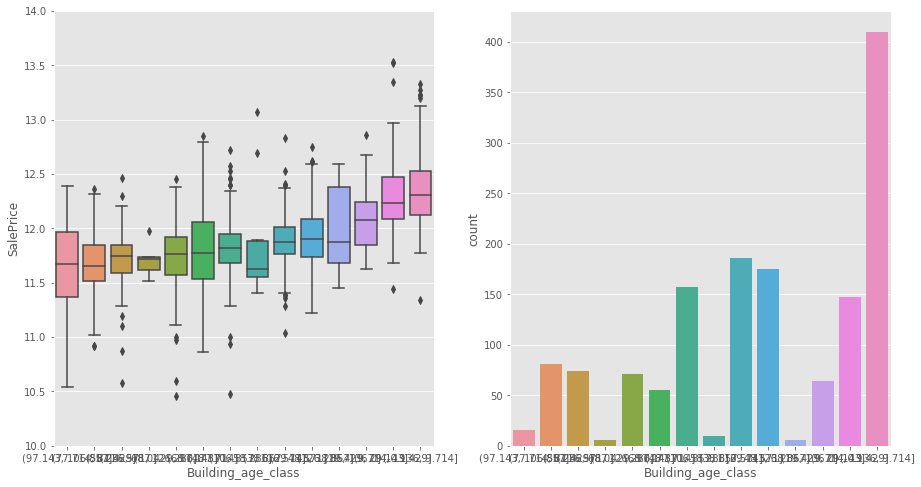

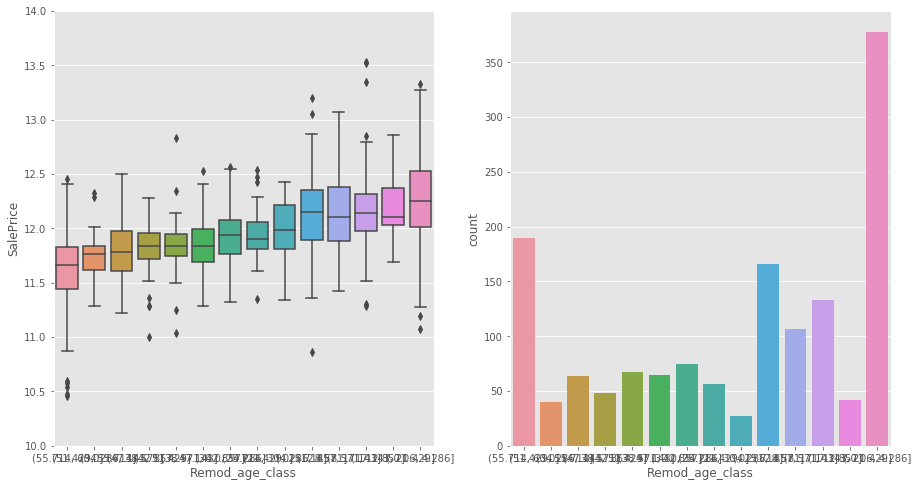

In [98]:

# 針對每個categorical variable，與SalePrice對對應，比較其中每個種類的出現次數/以及對應的SalePrice平均值
# 目的是試圖找出這些feature與SalePrice之間  有沒有相關
for i in categorical_cols:
    order_for_chart = total_data[~total_data.SalePrice.isnull()].groupby(i).SalePrice.mean()
    order_for_chart.sort_values(inplace=True)
    order_index = order_for_chart.index
    fig, ((ax1 ,ax2)) = plt.subplots(1,2,figsize=(15,8))
    sns.boxplot(x=i, y='SalePrice', data=total_data[~total_data.SalePrice.isnull()], order=order_index, ax=ax1)
    ax1.set_ylim((10,14))
    sns.countplot(x=i,data=total_data[~total_data.SalePrice.isnull()], order=order_index,ax=ax2)
    
# 在這邊，一樣運用同一類型數目超過總資料量的85% 就沒有統計意義的法則，做一些變數刪減

In [226]:
# remove not important (選擇保留0717)
# ignor_cols2 = ['BldgType','CentralAir','Condition1','Condition2','Electrical', 'ExterCond','Exterior1st',
#  'Exterior2nd','Functional', 'Heating', 'LandContour', 'LandSlope','PavedDrive', 'RoofMatl', 'SaleType',
#  'Street', 'Utilities'] #這一波刪了17個
# total_data.drop(columns=ignor_cols2, inplace=True)
# total_data.shape

(2917, 39)

In [71]:
# map specificated categorical variables with my definitions
exter_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
total_data['ExterQual'] = total_data['ExterQual'].map(exter_qual)
total_data['HeatingQC'] = total_data['HeatingQC'].map(exter_qual)
total_data['KitchenQual'] = total_data['KitchenQual'].map(exter_qual)

foundation = {'PConc':6, 'Wood':5, 'Stone':4, 'CBlock':3, 'BrkTil':2, 'Slab':1}
total_data['Foundation'] = total_data['Foundation'].map(foundation)


house_style = {'2.5Fin':6, '2Story':6, 'SLvl':5, '1Story':5, '2.5Unf':4, '1.5Fin':3, 'SFoyer':2, '1.5Unf':1}
total_data['HouseStyle'] = total_data['HouseStyle'].map(house_style)

lot_shape = {'IR2':4, 'IR3':3, 'IR1':2, 'Reg':1}
total_data['LotShape'] = total_data['LotShape'].map(lot_shape)

### One hot encoding

In [77]:
#Categorical columns use one hot encoding
total_data = pd.get_dummies(total_data)

In [78]:
total_data.shape

(2917, 244)

# Output csv

In [74]:
# # 資料還原為 train and test 
train = total_data[~total_data['SalePrice'].isnull()]
print(train.shape)
test = total_data[total_data['SalePrice'].isnull()]
test.drop(columns='SalePrice', inplace=True)
print(test.shape)

(1458, 244)
(1459, 243)


In [75]:
train.to_csv('train_one_hot.csv')
test.to_csv('test_one_hot.csv')

In [208]:
# todo 
# 非數值特徵轉化為分級數值後，可以做常態化嗎?   
# 帶有分級特性的數值特徵，可以做常態化嗎?

In [1]:
#筆記：在做資料處理時我的核心思想是
# 1.找出包含相同訊息的變量們，去蕪存菁，可避免多重共線性
# 2.將數值資料做常態化
# 3.帶有分級特性的非數值特徵，可轉為分級數值
# 4.帶有大量0值的數值特徵，可考慮創造新變數來分出(紀錄)0 或非0的資料

# 這種特徵工程做法的前提，是不是假設模型是線性模型
# 我如果保留了更多特徵(代表保留更多資訊量)， 再搭配非線性的模型，會有更好效果?

#### Next part of this project : 
https://github.com/SeanWangYS/Kaggle_house-price-prediction/blob/master/House%20Prices_Modeling%20%26%20Evaluation.ipynb